# ANTEA (I)PYTHON INTRODUCTION <br> Scientific Python environment

> *ANTEA Python Workshop*  
> *March 9 and 11, 2015*

> *© 2015, Stijn Van Hoey and Joris Van den Bossche  (<mailto:stijnvanhoey@gmail.com>, <mailto:jorisvandenbossche@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

# Pandas data analysis - case discharge data

## Introduction

Discharge (m3/s) for different stations in the Maarkebeek valley. The data used in this notebook are attributed to http://www.waterinfo.be/, and can also be accessed from this website.

In [1]:
from IPython.display import HTML
HTML('<iframe src=http://biomath.ugent.be/~stvhoey/maarkebeek_data/ width=700 height=350></iframe>')

In [2]:
# activating interactive plotting support
%matplotlib

Using matplotlib backend: Qt4Agg


In [3]:
# importing pandas and some other packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Anaconda\lib\site-packages\pytz\__init__.py:29: UserWarning: Module argparse was already imported from C:\Anaconda\lib\argparse.pyc, but c:\anaconda\lib\site-packages is being added to sys.path
  from pkg_resources import resource_stream


In [4]:
try:
    import seaborn
except ImportError:
    pass

## Importing the data

In [5]:
!head -5 data/FlowData.csv

Time;L06_347;LS06_347;LS06_348;LS06_34C;LS06_34D;LS06_34E;LS06_34G
2008-01-01 00:15:00;0,229;0,229;0,021;0,122;0,014;0,030;
2008-01-01 00:30:00;0,229;0,229;0,021;0,122;0,014;0,029;
2008-01-01 00:45:00;0,229;0,229;0,021;0,122;0,014;0,029;
2008-01-01 01:00:00;0,229;0,229;0,021;0,122;0,015;0,029;


**Exercise**: read in the data in an appropriate form (timeseries)

In [6]:
# read in the data
data = pd.read_csv('data/FlowData.csv', index_col=0, sep=';', decimal=',', parse_dates=True)

## Quickly exploring the data

In [7]:
data.head()

,L06_347,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E,LS06_34G
Time,,,,,,,
2008-01-01 00:15:00,0.229,0.229,0.021,0.122,0.014,0.030,NaN
2008-01-01 00:30:00,0.229,0.229,0.021,0.122,0.014,0.029,NaN
2008-01-01 00:45:00,0.229,0.229,0.021,0.122,0.014,0.029,NaN
2008-01-01 01:00:00,0.229,0.229,0.021,0.122,0.015,0.029,NaN
2008-01-01 01:15:00,0.229,0.229,0.021,0.122,0.015,0.029,NaN


In [8]:
data.tail()

,L06_347,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E,LS06_34G
Time,,,,,,,
2013-01-01 23:00:00,0.883,0.883,0.075,NaN,0.119,0.034,NaN
2013-01-01 23:15:00,0.875,0.875,0.075,NaN,0.118,0.034,NaN
2013-01-01 23:30:00,0.872,0.872,0.074,NaN,0.119,0.034,NaN
2013-01-01 23:45:00,0.873,0.873,0.075,NaN,0.116,0.035,NaN
2013-01-02 00:00:00,0.860,0.860,0.075,NaN,0.114,0.036,NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175488 entries, 2008-01-01 00:15:00 to 2013-01-02 00:00:00
Data columns (total 7 columns):
L06_347     175465 non-null float64
LS06_347    172153 non-null float64
LS06_348    163312 non-null float64
LS06_34C    104486 non-null float64
LS06_34D    174054 non-null float64
LS06_34E    171812 non-null float64
LS06_34G    93985 non-null float64
dtypes: float64(7)
memory usage: 10.7 MB


In [10]:
data[0:10000].plot()

In [11]:
data = data.drop('LS06_34G', axis=1)
data = data.drop('L06_347', axis=1)

In [12]:
%matplotlib inline

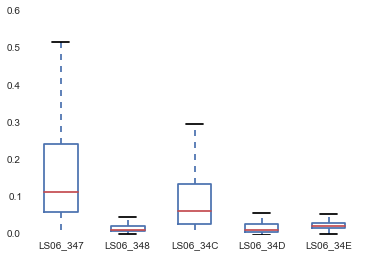

In [13]:
data.plot(kind='box', ylim=[0,0.6])

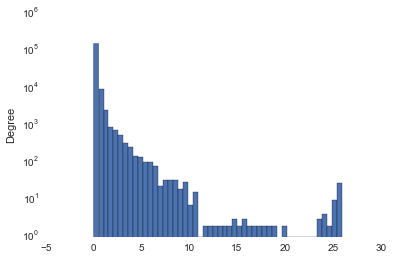

In [14]:
data['LS06_347'].plot(kind='hist', bins=50, logy=True)

In [15]:
data.describe()

,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E
count,172153.000000,163312.000000,104486.000000,174054.000000,171812.000000
mean,0.264058,0.025398,0.148447,0.030074,0.028579
std,0.732851,0.047489,0.444993,0.079334,0.027651
min,-0.019000,0.001000,-0.010000,0.000000,0.002000
25%,0.061000,0.009000,0.030000,0.008000,0.017000
50%,0.116000,0.013000,0.065000,0.014000,0.025000
75%,0.244000,0.025000,0.137000,0.028000,0.033000
max,25.900000,1.400000,13.800000,3.720000,1.650000


## Working with time series data

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [16]:
data.index

<class 'pandas.tseries.index.DatetimeIndex'>
[2008-01-01 00:15:00, ..., 2013-01-02 00:00:00]
Length: 175488, Freq: None, Timezone: None

Indexing a time series works with strings:

In [17]:
data["2010-01-01 09:00": "2010-01-01 10:00"]

,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E
Time,,,,,
2010-01-01 09:00:00,0.544,0.054,0.281,0.066,0.040
2010-01-01 09:15:00,0.539,0.054,0.280,0.065,0.039
2010-01-01 09:30:00,0.532,0.052,0.279,0.064,0.039
2010-01-01 09:45:00,0.533,0.052,0.279,0.064,0.039
2010-01-01 10:00:00,0.527,0.052,0.275,0.064,0.040


A nice feature is "partial string" indexing, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2012:

In [18]:
pd.options.display.max_rows = 6

In [19]:
data['2012']

,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E
Time,,,,,
2012-01-01 00:00:00,0.277,0.028,NaN,0.032,0.023
2012-01-01 00:15:00,0.276,0.028,NaN,0.031,0.023
2012-01-01 00:30:00,0.276,0.028,NaN,0.031,0.023
...,...,...,...,...,...
2012-12-31 23:15:00,0.985,0.209,NaN,0.358,0.121
2012-12-31 23:30:00,1.260,0.196,NaN,0.338,0.115
2012-12-31 23:45:00,1.480,0.183,NaN,0.320,0.107


Or all data of January up to March 2012:

In [20]:
data['2012-01':'2012-03']

,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E
Time,,,,,
2012-01-01 00:00:00,0.277,0.028,NaN,0.032,0.023
2012-01-01 00:15:00,0.276,0.028,NaN,0.031,0.023
2012-01-01 00:30:00,0.276,0.028,NaN,0.031,0.023
...,...,...,...,...,...
2012-03-31 23:15:00,0.119,0.010,NaN,0.013,0.017
2012-03-31 23:30:00,0.119,0.010,NaN,0.012,0.018
2012-03-31 23:45:00,0.118,0.009,NaN,0.012,0.019


Time and date components can be accessed from the index:

In [21]:
data.index.hour

array([ 0,  0,  0, ..., 23, 23,  0])

In [22]:
data.index.year

array([2008, 2008, 2008, ..., 2013, 2013, 2013])

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from minutely to hourly data).

The time series has a frequency of 15 min. I want to change this to daily:

In [23]:
data.resample('D').head()

,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E
Time,,,,,
2008-01-01,0.217800,0.021368,0.115032,0.015379,0.028432
2008-01-02,0.178688,0.022062,0.095115,0.014344,0.028708
2008-01-03,0.194635,0.022490,0.104104,0.017250,0.030406
2008-01-04,0.199156,0.020448,0.106344,0.017073,0.032115
2008-01-05,0.891625,0.108885,0.491875,0.124115,0.067510


By default, `resample` takes the mean as aggregation function, but other methods can also be specified:

In [24]:
data.resample('D', how='max').head()

,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E
Time,,,,,
2008-01-01,0.229,0.022,0.122,0.017,0.030
2008-01-02,0.202,0.025,0.108,0.019,0.033
2008-01-03,0.215,0.030,0.115,0.021,0.036
2008-01-04,0.247,0.022,0.132,0.022,0.034
2008-01-05,1.730,0.312,0.924,0.336,0.164


The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/dev/timeseries.html#offset-aliases  
These strings can also be combined with numbers, eg `'10D'`.

**Exercise**: plot the monthly mean and median flow of the 'LS06_347' station

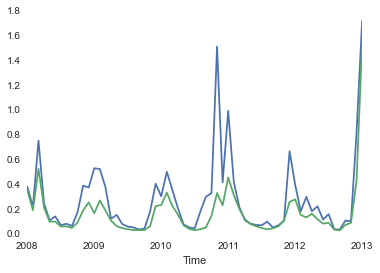

In [25]:
data['LS06_347'].resample('M', how='mean').plot()
data['LS06_347'].resample('M', how='median').plot()

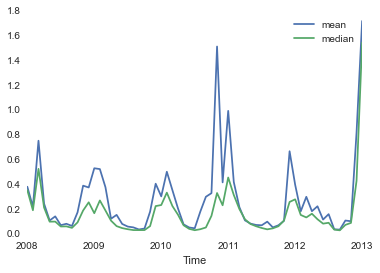

In [26]:
data['LS06_347'].resample('M', how=['mean', 'median']).plot()

**Exercise**: plot the monthly mininum and maximum daily flow of the 'LS06_347' station

In [27]:
daily = data['LS06_347'].resample('D')

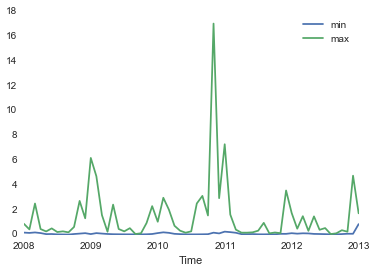

In [28]:
daily.resample('M', how=['min', 'max']).plot()

**Exercise**: make a bar plot of the mean of the stations in year of 2012

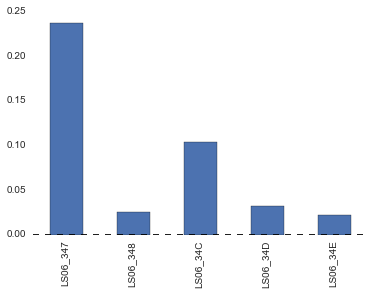

In [29]:
data['2012'].mean().plot(kind='bar')

**Exercise**: plot the evolution of the yearly averages with, and the overall mean of all stations

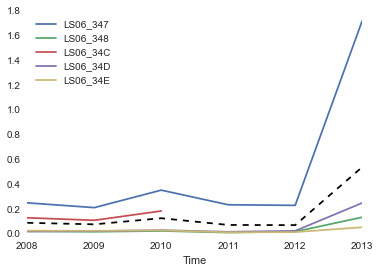

In [30]:
data.resample('A').plot()
data.mean(axis=1).resample('A').plot(color='k', linestyle='--')

## Intermezzo - the groupby operation (split-apply-combine)

By "group by" we are referring to a process involving one or more of the following steps

* **Splitting** the data into groups based on some criteria
* **Applying** a function to each group independently
* **Combining** the results into a data structure

<img src="img/splitApplyCombine.png">

Similar to SQL `GROUP BY`

The example of the image in pandas syntax:

In [31]:
df = pd.DataFrame({'key':['A','B','C','A','B','C','A','B','C'],
                   'data': [0, 5, 10, 5, 10, 15, 10, 15, 20]})
df

,data,key
0,0,A
1,5,B
2,10,C
...,...,...
6,10,A
7,15,B
8,20,C


In [32]:
df.groupby('key').aggregate('sum')  # np.sum

,data
key,
A,15
B,30
C,45


In [33]:
df.groupby('key').sum()

,data
key,
A,15
B,30
C,45


## Back to the discharge data

**Exercise**: add a column to the dataframe that indicates the month (integer value of 1 to 12)

In [34]:
data['month'] = data.index.month

**Exercise**: calculate the mean of each month

In [35]:
data.groupby('month').mean()

,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E
month,,,,,
1,0.516500,0.040655,0.219325,0.056708,0.035919
2,0.373510,0.034193,0.224311,0.038369,0.031743
3,0.409018,0.040191,0.273341,0.043239,0.033563
...,...,...,...,...,...
10,0.155627,0.018108,0.100917,0.017473,0.025239
11,0.464682,0.036403,0.373533,0.050763,0.032998
12,0.542970,0.058764,0.216330,0.068874,0.036984


**Exercise**: plot the typical monthly profile of the different stations

In [36]:
data.groupby('month').mean()

,LS06_347,LS06_348,LS06_34C,LS06_34D,LS06_34E
month,,,,,
1,0.516500,0.040655,0.219325,0.056708,0.035919
2,0.373510,0.034193,0.224311,0.038369,0.031743
3,0.409018,0.040191,0.273341,0.043239,0.033563
...,...,...,...,...,...
10,0.155627,0.018108,0.100917,0.017473,0.025239
11,0.464682,0.036403,0.373533,0.050763,0.032998
12,0.542970,0.058764,0.216330,0.068874,0.036984


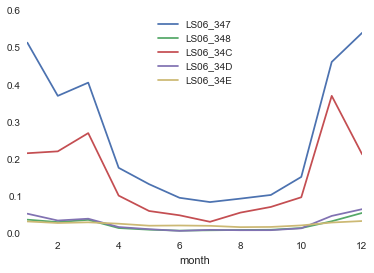

In [37]:
data.groupby('month').mean().plot()

**Exercise**: plot the monthly min and 90% percentile of the 'LS06_347' 

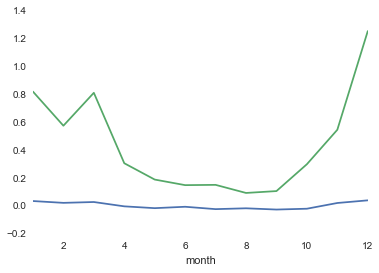

In [38]:
data.groupby('month')['LS06_347'].min().plot()
data.groupby('month')['LS06_347'].quantile(0.9).plot()

**Exercise**: calculate the number of peaks per season for each year

- add a column that indicates the season
- define what a peak is (above threshold, certain percentile?)
- count the peaks per year and per season

In [39]:
# add a season column
data['season'] = 1  # winter
data.loc[data['month'] > 2, 'season'] = 2
data.loc[data['month'] > 5, 'season'] = 3
data.loc[data['month'] > 8, 'season'] = 4
data.loc[data['month'] > 11, 'season'] = 1

In [40]:
# peaks are above overall 95 percentile
data_peak = data > data.quantile(0.95)

In [41]:
data_peak.groupby([data_peak.index.year, data['season']]).sum()

LS06_347  LS06_348  LS06_34C  LS06_34D  LS06_34E  month  season
     season                                                                 
2008 1            396       520       387       529       498      0       0
     2            870       911       845       764       759      0       0
     3             29       103        29        44       308      0       0
...               ...       ...       ...       ...       ...    ...     ...
2012 3             86       100         0       136       153      0       0
     4             13        34         0        85        64      0       0
2013 1             97        92         0        97        50      0       0

[21 rows x 7 columns]